In [1]:
import pandas as pd
import numpy as np

In [2]:
#2.1 以 DataFrame 格式載入 train.csv

data = pd.read_csv("train.csv")
train = pd.DataFrame(data)


In [3]:
#2.2 請檢查並列出 train.csv 中每個欄位的空值個數

sum =  train.isna().sum()
print(sum)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#2.3 將 Age 欄位空值以該性別平均值填入
train_male_filter=train['Sex']!="female" 
train_female_filter=train['Sex']=="female"

train_male=train[train_male_filter]
train_female=train[train_female_filter]

femaleaverage=train[train_female_filter]['Age'].mean()
maleaverage=train[train_male_filter]['Age'].mean()

train_male['Age'].fillna(value=maleaverage,inplace=True)
train_female['Age'].fillna(value=femaleaverage,inplace=True)

final=pd.concat([train_male,train_female])
final.sort_index()
train=final

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
#2.4 將 Cabin 欄位重製為 Pclass * Fare

train['Cabin']=train['Pclass']*train['Fare']

In [6]:
#2.5 將 Survived 欄位重製為 0=Alive 1=Dead 

train['Survived']=train['Survived'].replace(0,'Alive')
train['Survived']=train['Survived'].replace(1,'Dead')

In [7]:
#2.6 將 Sex 與 Embarked 欄位轉為數字型態

train['Sex']=train['Sex'].replace('male',0)
train['Sex']=train['Sex'].replace('female',1)

train['Embarked']=train['Embarked'].replace('S',0)
train['Embarked']=train['Embarked'].replace('C',1)
train['Embarked']=train['Embarked'].replace('Q',2)

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
#處理Embarked欄位空值
train['Embarked']=train['Embarked'].fillna(method='pad')

In [10]:
"""
2.7 以 PassengerId、Survived、Name、Ticket、Pclass 以外的欄位作為訓練
資料，建立 Decision tree 來預測 Survived，將訓練資料比例設為 50%，
random_state 設為 12，stratify = y，並繪出 Decision tree 的樹狀圖

"""
X=train.drop(['PassengerId','Survived','Name','Ticket','Pclass'], axis=1)
y=train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.5, random_state=12,stratify=y)
clf= DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


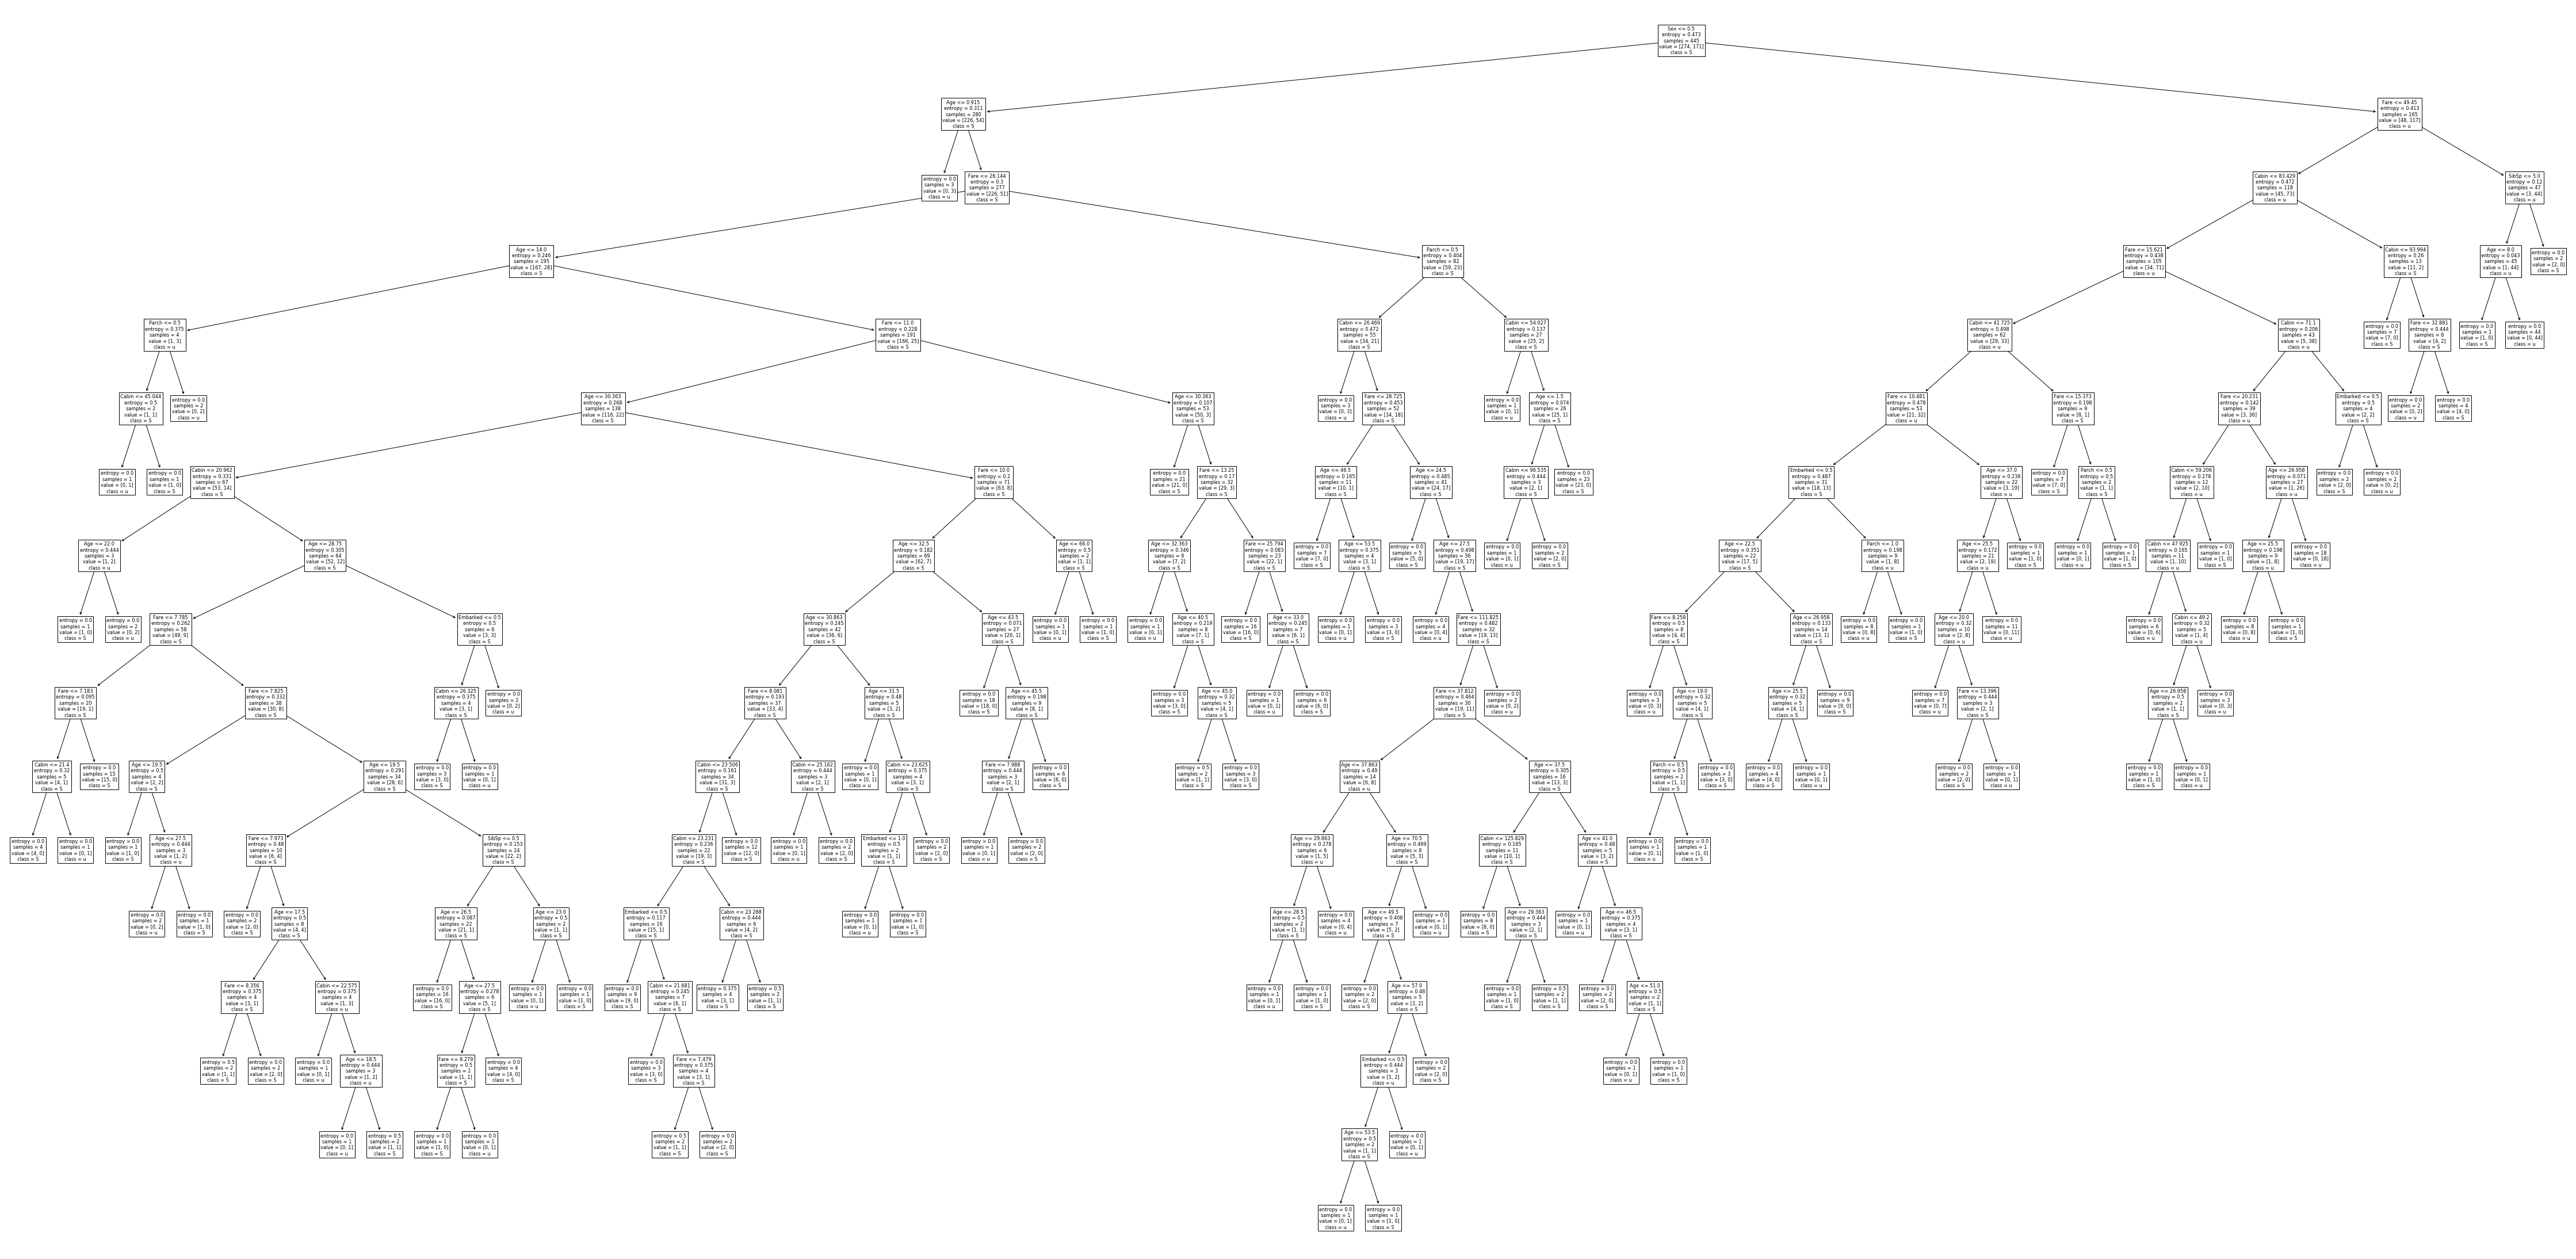

In [14]:
fig, ax = plt.subplots(figsize=(80,40))
plot_tree(clf,feature_names=['Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'],class_names='Survived');

In [15]:
#2.8 計算出在 2.7 測試資料上的平均準確率
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import precision_score

score=cross_val_score(clf, X, y, cv=20, scoring='accuracy').mean()

clf = clf.fit(X_train,y_train)
score=cross_val_score(clf, X, y, cv=20, scoring='accuracy').mean()
score

0.7774846288976723

In [16]:
#2.9 用 2.7 的結果評估決策樹好壞(使用 classification_report)產生類似以下結果

from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.81      0.80      0.81       275
        Dead       0.69      0.69      0.69       171

    accuracy                           0.76       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.76      0.76      0.76       446



In [17]:
"""
2.10 分別以訓練資料比例 60%、70%、
80%、90% 建立 Decision tree，
random_state 皆設為 12，並將不同資料
比例與平均準確率的比較結果以
DataFrame 呈現
"""
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size= 0.6, random_state=12,stratify=y)
clf1= DecisionTreeClassifier()
clf1 = clf1.fit(X_train1,y_train1)
score1=cross_val_score(clf1, X, y, cv=20, scoring='accuracy').mean()


X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size= 0.7, random_state=12,stratify=y)
clf2= DecisionTreeClassifier()
clf2 = clf1.fit(X_train2,y_train2)
score2=cross_val_score(clf2, X, y, cv=20, scoring='accuracy').mean()


X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, test_size= 0.8, random_state=12,stratify=y)
clf3= DecisionTreeClassifier()
clf3 = clf1.fit(X_train3,y_train3)
score3=cross_val_score(clf3, X, y, cv=20, scoring='accuracy').mean()




X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y, test_size= 0.9, random_state=12,stratify=y)
clf4= DecisionTreeClassifier()
clf4 = clf1.fit(X_train4,y_train4)
score4=cross_val_score(clf4, X, y, cv=20, scoring='accuracy').mean()




allaccuracy={
    'split_proportion':["50/50","60/40","70/30","80/20","90/10"],
    'score':[score,score1,score2,score3,score4]
}
df = pd.DataFrame(allaccuracy)
df

,split_proportion,score
0,50/50,0.777485
1,60/40,0.789884
2,70/30,0.784203
3,80/20,0.778546
4,90/10,0.771853


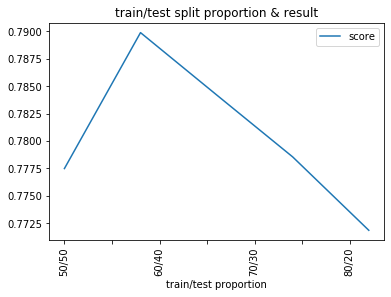

In [18]:
#2.11 呈上題，將此比較結果以折線圖呈現
plt.xticks(np.linspace(0,5,9),['50/50','','60/40','','70/30',' ','80/20','','90/10'])

plt.plot(df["split_proportion"],df["score"],label="score")
plt.title("train/test split proportion & result")
plt.xlabel("train/test proportion")
plt.xticks(rotation=90)
plt.legend()


In [19]:
#匯出整理後的csv檔
train.to_csv("ECT_HW2_108403201.csv")